## <font color='blue'>Regularización</font>

La regularización es un método matemático que permite reducir los efectos del ruido en problemas inversos imponiendo algún tipo de restricción en la función objetivo. Particularmente en el caso de la regresión lineal se determinó que cuando se presenta sobreajuste los coeficientes del polinomio tienden a aumentar en maginitud. La función objetivo
regularizada está dada por:

$$E({\bf{w}}) = \frac{1}{2}\sum_{l=0}^{L-1}\left( y^{(l)} - f({\bf{x}}^{(l)},{\bf{w}})\right) ^2 + \frac{\lambda}{2}\|{\bf{w}}\|^2$$

Entre mayor sea el valor de $\lambda$, mayor será la penalización por complejidad del modelo.

Derivada de la función de coste

$$\frac{\partial E({\bf{w}})}{\partial {\bf{w}}} = \frac{2}{2}\sum_{l=0}^{L-1}\left( y^{(l)} - f({\bf{x}}^{(l)},{\bf{w}})\right) \frac{\partial \left( y^{(l)} - f({\bf{x}}^{(l)},{\bf{w}})\right)}{\partial {\bf{w}}} + \frac{2\lambda}{2}\|{\bf{w}}\|$$

$$\frac{\partial E({\bf{w}})}{\partial {\bf{w}}} = \sum_{l=0}^{L-1}\left( y^{(l)} - f({\bf{x}}^{(l)},{\bf{w}})\right) \frac{\partial \left( - f({\bf{x}}^{(l)},{\bf{w}})\right)}{\partial {\bf{w}}} + \lambda\|{\bf{w}}\|$$

$$\frac{\partial E({\bf{w}})}{\partial {\bf{w}}} = \sum_{l=0}^{L-1}\left( y^{(l)} - {\bf{w}}^{\top}{\bf{x}}_e^{(l)}\right) \left( - {\bf{w}}{\bf{x}}_e^{(l)}\right) + \lambda\|{\bf{w}}\|=0$$


$$\left( y^{(0)} - {\bf{w}}^{\top}{\bf{x}}_e^{(0)}\right) \left( - {\bf{w}}{\bf{x}}_e^{(0)}\right) + \left( y^{(1)} - {\bf{w}}^{\top}{\bf{x}}_e^{(1)}\right) \left( - {\bf{w}}{\bf{x}}_e^{(1)}\right)+\cdots+\left( y^{(L-1)} - {\bf{w}}^{\top}{\bf{x}}_e^{(L-1)}\right) \left( - {\bf{w}}{\bf{x}}_e^{(L-1)}\right)+ \lambda\|{\bf{w}}\|=0$$

$$- {\bf{w}}\{ \left( y^{(0)} - {\bf{w}}^{\top}{\bf{x}}_e^{(0)}\right) \left( {\bf{x}}_e^{(0)}\right) + \left( y^{(1)} - {\bf{w}}^{\top}{\bf{x}}_e^{(1)}\right) \left({\bf{x}}_e^{(1)}\right)+\cdots+\left( y^{(L-1)} - {\bf{w}}^{\top}{\bf{x}}_e^{(L-1)}\right) \left( {\bf{x}}_e^{(L-1)}\right) \}+ \lambda\|{\bf{w}}\|=0$$

$${\bf{w}}\left({\bf{X}}_e^{\top}{\bf{X}}_e+\lambda {\bf{I}}\right)={\bf{X}}_e^{\top}{\bf{Y}}$$

$${\bf{w}}=\left({\bf{X}}_e^{\top}{\bf{X}}_e+\lambda {\bf{I}}\right)^{-1}{\bf{X}}_e^{\top}{\bf{Y}}$$



Las estrategias de regularización incorporan penalizaciones en el ajuste por mínimos cuadrados ordinarios (OLS) con el objetivo de evitar overfitting, reducir varianza, atenuar el efecto de la correlación entre predictores y minimizar la influencia en el modelo de los predictores menos relevantes. Por lo general, aplicando regularización se consigue modelos con mayor poder predictivo (generalización).

Dado que estos métodos de regularización actúan sobre la magnitud de los coeficientes del modelo, todos deben de estár en la misma escala, por esta razón es necesario estandarizar o normalizar los predictores antes de entrenar el modelo.

## <font color='blue'>Ridge</font>

La regularización Ridge penaliza la suma de los coeficientes elevados al cuadrado $(||{\bf w }||^2_2 = \sum_{n=1} ^N w^2_n)$. A esta penalización se le conoce como $L2$ y tiene el efecto de reducir de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero. El grado de penalización está controlado por el hiperparámetro $\lambda$. Cuando $\lambda = 0$, la penalización es nula y el resultado es equivalente al de un modelo lineal por mínimos cuadrados ordinarios (OLS). A medida que $\lambda$ aumenta, mayor es la penalización y menor el valor de los predictores.

$$\sum^L_{l=1}(y^{(l)} - w_0 - \sum^N_{n=1} w_n x_{n}^{(l)})^2 + \lambda \sum^N_{n=1} w_n^2 = \text{suma residuos cuadrados} + \lambda \sum^N_{n=1} w_n^2$$
La principal ventaja de aplicar ridge frente al ajuste por mínimos cuadrados ordinarios (OLS) es la reducción de varianza. Por lo general, en situaciones en las que la relación entre la variable respuesta y los predictores es aproximadamente lineal, las estimaciones por mínimos cuadrados tienen poco bias pero aún pueden sufrir alta varianza (pequeños cambios en los datos de entrenamiento tienen mucho impacto en el modelo resultante). Este problema se acentúa conforme el número de predictores introducido en el modelo se aproxima al número de observaciones de entrenamiento, llegando al punto en que, si $N>L$, no es posible ajustar el modelo por mínimos cuadrados ordinarios. Empleando un valor adecuado de $\lambda$, el método de ridge es capaz de reducir varianza sin apenas aumentar el bias, consiguiendo así un menor error total.

La desventaja del método ridge es que, el modelo final, incluye todos los predictores. Esto es así porque, si bien la penalización fuerza a que los coeficientes tiendan a cero, nunca llegan a ser exactamente cero (solo si $\lambda=\infty$). Este método consigue minimizar la influencia sobre el modelo de los predictores menos relacionados con la variable respuesta pero, en el modelo final, van a seguir apareciendo. Aunque esto no supone un problema para la precisión del modelo, sí lo es para su interpretación.

## <font color='blue'>Lasso</font>

La regularización Lasso penaliza la suma del valor absolutos de los coeficientes de regresión $(||{\bf w }||_1 = \sum_{n=1} ^N |w_n|)$. A esta penalización se le conoce como $L1$ y tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero. Dado que un predictor con coeficiente de regresión cero no influye en el modelo, lasso consigue excluir los predictores menos relevantes. Al igual que en ridge, el grado de penalización está controlado por el hiperparámetro $\lambda$. Cuando $\lambda = 0$, el resultado es equivalente al de un modelo lineal por mínimos cuadrados ordinarios. A medida que $\lambda$ aumenta, mayor es la penalización y más predictores quedan excluidos.

$$\sum^L_{l=1}(y^{(l)} - w_0 - \sum^N_{n=1} w_n x_{n}^{(l)})^2 + \lambda \sum^N_{n=1} |w_n| = \text{suma residuos cuadrados} + \lambda \sum^N_{n=1} |w_n|$$



## <font color='blue'>Comparación Ridge y Lasso</font>


La principal diferencia práctica entre lasso y ridge es que el primero consigue que algunos coeficientes sean exactamente cero, por lo que realiza selección de predictores, mientras que el segundo no llega a excluir ninguno. Esto supone una ventaja notable de lasso en escenarios donde no todos los predictores son importantes para el modelo y se desea que los menos influyentes queden excluidos.

Por otro lado, cuando existen predictores altamente correlacionados (linealmente), ridge reduce la influencia de todos ellos a la vez y de forma proporcional, mientras que lasso tiende a seleccionar uno de ellos, dándole todo el peso y excluyendo al resto. En presencia de correlaciones, esta selección varía mucho con pequeñas perturbaciones (cambios en los datos de entrenamiento), por lo que, las soluciones de lasso, son muy inestables si los predictores están altamente correlacionados.

Para conseguir un equilibrio óptimo entre estas dos propiedades, se puede emplear lo que se conoce como penalización elastic net, que combina ambas estrategias.

## <font color='blue'>Elastic net</font>

Elastic net incluye una regularización que combina la penalización $L1$ y $L2$ $ \lambda (\alpha||{\bf w}||_1 + \frac{1}{2}(1- \alpha)||{\bf w}||^2_2)$. El grado en que influye cada una de las penalizaciones está controlado por el hiperparámetro $\alpha$. Su valor está comprendido en el intervalo [0,1]. Cuando $\alpha = 0$, se aplica ridge y cuando $\alpha = 1$ se aplica lasso. La combinación de ambas penalizaciones suele dar lugar a buenos resultados. Una estrategia frecuentemente utilizada es asignarle casi todo el peso a la penalización $L1$ ($\alpha$ muy próximo a 1) para conseguir seleccionar predictores y un poco a la $L2$ para dar cierta estabilidad en el caso de que algunos predictores estén correlacionados.

$$\frac{\sum^L_{l=1}(y^{(l)} - w_0 - \sum^N_{n=1} w_n x_{n}^{(l)})^2}{2L} + \lambda (\alpha \sum^N_{n=1} |w_n| + \frac{1-\alpha}{2}  \sum^N_{n=1} w_n^2)$$


## <font color='blue'>Lambda Search</font>


Encontrar el mejor modelo implica identificar el valor óptimo del hiperparámetro de regularización lambda ($\lambda$). Al tratarse de un hiperparámetro, no hay forma de saber de antemano qué valor es el adecuado. Una forma de lograrlo es emplear validación cruzada o generalized cross validation, esta última es una adaptación eficiente de leave-one-out cross validation disponible para la regulación Ridge. Con scikit learn esto puede conseguirse fácilmente de dos formas:

<font color='blue'>Combinar GridSearchCV y un modelo de tipo Ridge, Lasso o ElasticNet.</font>

Emplear RidgeCV, LassoCV o ElasticNetCV. Son adaptaciones que incorporan validación cruzada. Si no se indica nada en el argumento cv, en RidgeCV, se aplica Generalized Cross-Validation (GCV). Si se le indica un valor entero, se aplica validación cruzada con GridSearchCV. Por ejemplo cv=10 equivale a 10-fold cross-validation, en lugar de Generalized Cross-Validation.

Por lo general, las versiones que incorporan la validación cruzada son más directas y cómodas de utilizar, sin embargo, hay situaciones para las que no son adecuadas. Por ejemplo, si los datos tienen un orden temporal (series temporales), la validación cruzada debe hacer un reparto ordenado de las observaciones, lo que se consigue combinando sklearn.model_selection.TimeSeriesSplit con GridSearchCV. Para más información sobre cómo utilizar GridSearchCV consultar machine learning con scikit learn.

<font color='blue'>Se emplee un método u otro siempre hay que estandarizar o normalizar los predictores.</font>

Aunque el valor óptimo de $\lambda$ es aquel con el que se minimiza el error de validación cruzada, una práctica extendida es utilizar, en lugar de este, el mayor valor de $\lambda$ que se aleja menos de una desviación típica del óptimo. De este modo, se consigue un modelo más sencillo (excluye más predictores) pero cuya capacidad predictiva es similar a la conseguida con el modelo más complejo.

**_Nota:** scikitlearn utiliza el argumento alpha para hacer referencia a lambda y el argumento l1ratio para referirse a alpha.

## <font color='blue'>Ejemplo regresión</font>

El departamento de calidad de una empresa de alimentación se encarga de medir el contenido en grasa de la carne que comercializa. Este estudio se realiza mediante técnicas de analítica química, un proceso relativamente costoso en tiempo y recursos. Una alternativa que permitiría reducir costes y optimizar tiempo es emplear un espectrofotómetro (instrumento capaz de detectar la absorbancia que tiene un material a diferentes tipos de luz en función de sus características) e inferir el contenido en grasa a partir de sus medidas.

Antes de dar por válida esta nueva técnica, la empresa necesita comprobar qué margen de error tiene respecto al análisis químico. Para ello, se mide el espectro de absorbancia a 100 longitudes de onda en 215 muestras de carne, cuyo contenido en grasa se obtiene también por análisis químico, y se entrena un modelo con el objetivo de predecir el contenido en grasa a partir de los valores dados por el espectrofotómetro.

Los datos meatspec.csv empleados en este ejemplo se han obtenido del magnífico libro Linear Models with R, Second Edition.

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## <font color='blue'>Datos</font>


El set de datos contiene 101 columnas. Las 100 primeras, nombradas como $V1$, ..., $V100$ recogen el valor de absorbancia para cada una de las 100 longitudes de onda analizadas (predictores), y la columna fat el contenido en grasa medido por técnicas químicas (variable respuesta).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Datos
# ==============================================================================
datos = pd.read_csv('/content/drive/MyDrive/DOCENCIA/PreGrado/MachineLearning/ML-UCSP/CONTENIDO 2025/Dataset/meatspec.csv')
datos = datos.drop(columns = datos.columns[0])
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Columns: 101 entries, V1 to fat
dtypes: float64(101)
memory usage: 169.8 KB


In [5]:
datos.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [6]:
datos.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2.808561,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,...,3.178262,3.158254,3.138534,3.119104,3.099971,3.081070,3.062290,3.043548,3.024895,18.142326
std,0.410793,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,...,0.541957,0.541776,0.541519,0.541135,0.540563,0.539730,0.538586,0.537108,0.535354,12.740297
min,2.066420,2.065830,2.065180,2.064650,2.064170,2.063730,2.063400,2.063140,2.063010,2.063170,...,2.339720,2.320940,2.300430,2.280180,2.260580,2.241710,2.223520,2.206020,2.189130,0.900000
25%,2.512265,2.513260,2.514210,2.515330,2.516775,2.518240,2.518305,2.518605,2.519185,2.521480,...,2.781960,2.763715,2.741450,2.722130,2.702475,2.682635,2.664900,2.647370,2.628230,7.300000
50%,2.753600,2.755180,2.756680,2.758240,2.759860,2.761610,2.763550,2.765680,2.768660,2.770720,...,3.079400,3.058200,3.036290,3.014480,2.993020,2.971850,2.953740,2.935140,2.915640,14.000000
75%,3.006155,3.010470,3.014840,3.019260,3.025895,3.032780,3.039780,3.046930,3.054310,3.061875,...,3.493140,3.477830,3.462340,3.446320,3.429490,3.411360,3.393100,3.375965,3.358195,28.000000
max,4.237280,4.247210,4.257370,4.267730,4.278470,4.289680,4.301330,4.313310,4.325870,4.339270,...,5.128190,5.111870,5.095180,5.077600,5.058950,5.038260,5.015710,4.991070,4.965430,49.100000


## <font color='blue'>Relación entre variables</font>


El primer paso a la hora de establecer un modelo lineal múltiple es estudiar la relación que existe entre variables. Esta información es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, y para detectar colinealidad entre predictores. A modo complementario, es recomendable representar la distribución de cada variable mediante histogramas.

In [7]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
1019,V11,V10,0.999996,0.999996
919,V10,V11,0.999996,0.999996
1121,V12,V11,0.999996,0.999996
1021,V11,V12,0.999996,0.999996
917,V10,V9,0.999996,0.999996


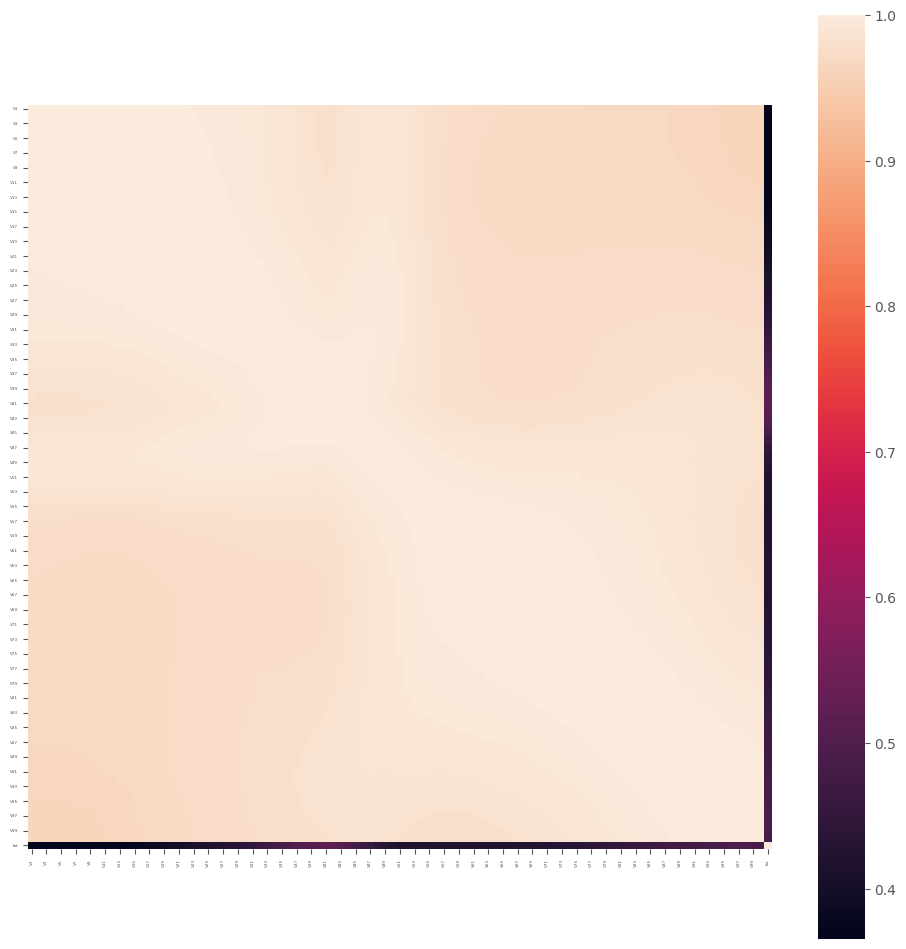

In [8]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax
)

ax.tick_params(labelsize = 3)

Muchas de las variables están altamente correlacionadas (correlación absoluta > 0.8), lo que supone un problema a la hora de emplear modelos de regresión lineal.



## <font color='blue'>Modelos</font>


Se ajustan varios modelos lineales con y sin regularización, con el objetivo de identificar cuál de ellos es capaz de predecir mejor el contenido en grasa de la carne en función de las señales registradas por el espectrofotómetro.

Para poder evaluar la capacidad predictiva de cada modelo, se dividen las observaciones disponibles en dos grupos: uno de entrenamiento (70%) y otro de test (30%).

**OLS**

In [9]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns='fat')
y = datos['fat']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [10]:
m1 = np.mean(X_train)
std1 = np.std(X_train)
X_train = (X_train - m1) / std1
X_test = (X_test - m1) / std1

In [11]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [13]:
modelo.coef_

array([[  3113.92663419,  -3143.72598499,  -1790.02538269,
          6760.4154741 ,  -7495.40898337,    590.53191027,
          -560.99254677,   4251.20358855,  -8626.70034131,
         13260.81220094, -17559.62642531,  26252.73490372,
        -26765.38750434,  24546.79955689, -17376.34067226,
           729.95412788,   5967.18373884,  -3044.75099924,
          3985.35151381,  -1808.84137709, -14363.91014536,
         27309.61212408, -18638.45585533,   4655.11126565,
          -392.44375319,    565.07591071,  -2652.05855958,
          9966.68943393, -17055.7237768 ,  16903.73700414,
        -17584.83762866,  22202.28260936, -12702.76789899,
         -1298.88099026,  -2460.35574446,   3700.89713249,
           636.59792531,  -7600.46632362,  19330.85006544,
        -19610.95383154,  19120.45869209, -14767.28370382,
         -2714.36418191,   2593.74940151,  12445.57685676,
        -11163.80669206,   4718.01009306,  -4390.42459599,
          3479.37587907,  -6643.75153172,  12376.5081400

In [14]:
modelo.intercept_

array([11.21279131])

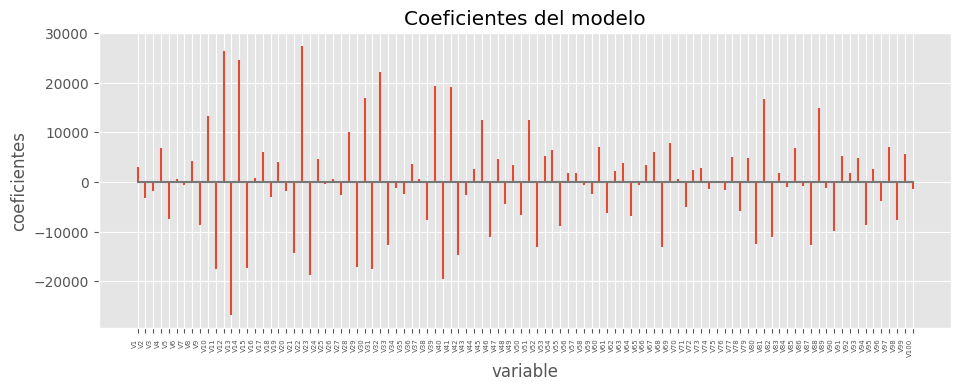

In [15]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [16]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([36.88226752, 62.47992661, 61.04825535,  9.95161352, 18.11993067,
        6.56158193, 28.42860453,  9.18085599, 15.56800749, 16.50461443])

In [18]:
# Error de test del modelo
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones
           )
print("")
# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_ols = np.sqrt(rmse_ols)
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 3.8396675856424793


Las predicciones del modelo final se alejan en promedio 3.84 unidades del valor real.

**Ridge**

In [19]:
np.logspace(-10, 1, 200)

array([1.00000000e-10, 1.13573336e-10, 1.28989026e-10, 1.46497140e-10,
       1.66381689e-10, 1.88965234e-10, 2.14614120e-10, 2.43744415e-10,
       2.76828663e-10, 3.14403547e-10, 3.57078596e-10, 4.05546074e-10,
       4.60592204e-10, 5.23109931e-10, 5.94113398e-10, 6.74754405e-10,
       7.66341087e-10, 8.70359136e-10, 9.88495905e-10, 1.12266777e-09,
       1.27505124e-09, 1.44811823e-09, 1.64467618e-09, 1.86791360e-09,
       2.12145178e-09, 2.40940356e-09, 2.73644000e-09, 3.10786619e-09,
       3.52970730e-09, 4.00880633e-09, 4.55293507e-09, 5.17092024e-09,
       5.87278661e-09, 6.66991966e-09, 7.57525026e-09, 8.60346442e-09,
       9.77124154e-09, 1.10975250e-08, 1.26038293e-08, 1.43145894e-08,
       1.62575567e-08, 1.84642494e-08, 2.09704640e-08, 2.38168555e-08,
       2.70495973e-08, 3.07211300e-08, 3.48910121e-08, 3.96268864e-08,
       4.50055768e-08, 5.11143348e-08, 5.80522552e-08, 6.59318827e-08,
       7.48810386e-08, 8.50448934e-08, 9.65883224e-08, 1.09698580e-07,
      

In [20]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelo = RidgeCV(
            alphas          = np.logspace(-10, 1, 200),
            fit_intercept   = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

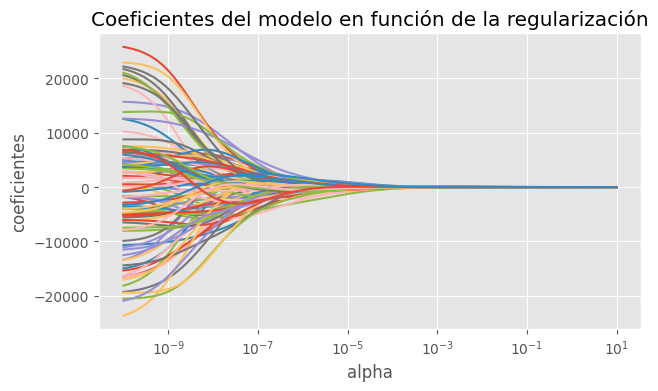

In [21]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

Puede ver se como, a medida que aumenta el valor de alpha, la regularización es mayor y el valor de los coeficientes se reduce.



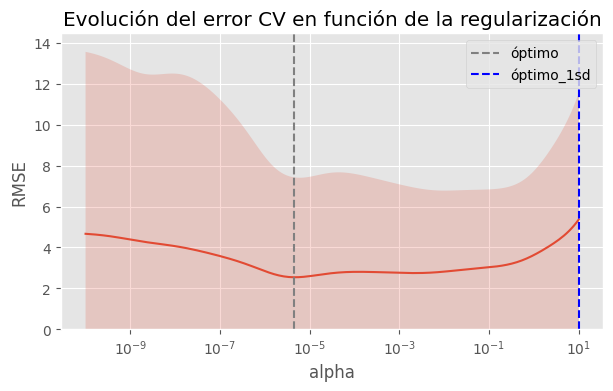

In [22]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [23]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 4.397603609302721e-06


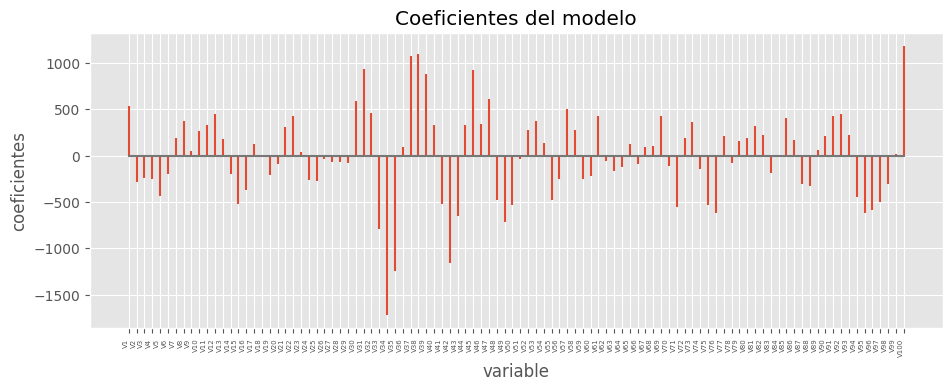

In [24]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

En comparación al modelo por mínimos cuadrados ordinarios, con ridge, el orden de magnitud de los coeficientes es mucho menor.

In [25]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([43.14208297, 40.36063077, 51.87965851, 10.00021672, 17.88565833,
        7.64607101, 28.18338563,  8.2164868 , 14.70668089, 14.37726486])

In [28]:
# Error de test del modelo
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones
             )
print("")
# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_ridge = np.sqrt(rmse_ridge)
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 2.4542610665448925


Las predicciones del modelo final se alejan en promedio 2.45 unidades del valor real.

**Lasso**

In [29]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

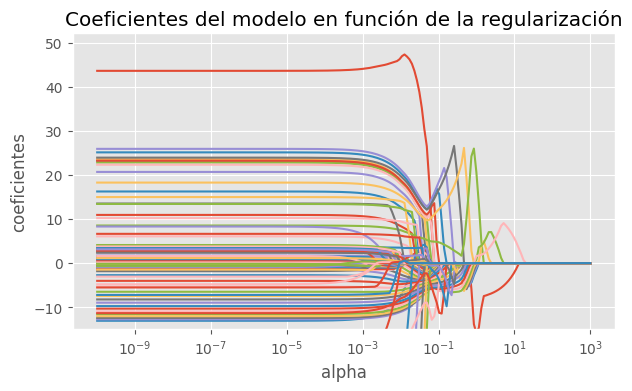

In [30]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

Puede ver se como, a medida que aumenta el valor de alpha, la regularización es mayor y más predictores quedan excluidos (su coeficiente es 0).

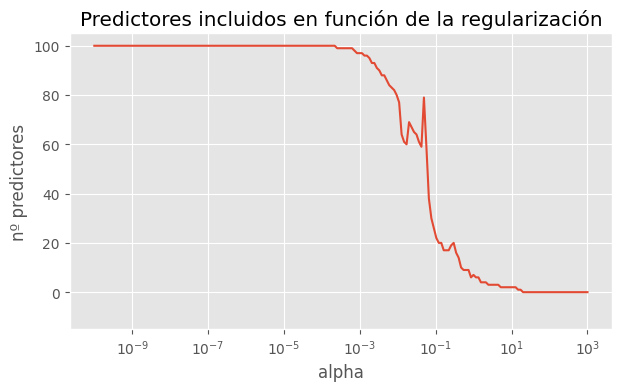

In [31]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

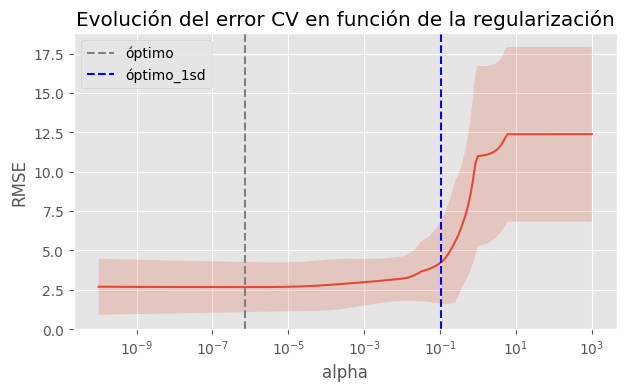

In [32]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [33]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 7.149428986597591e-07


In [34]:
# Mejor valor alpha encontrado + 1sd
# ==============================================================================
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [0.10353218]


Se entrena de nuevo el modelo, esta vez empleando el mayor valor de alpha cuyo error está a menos de una desviación típica del mínimo encontrado en la validación cruzada.

In [35]:
optimo_1sd

array([0.10353218])

In [36]:
# Mejor modelo alpha óptimo + 1sd
# ==============================================================================
modelo = Lasso(alpha=optimo_1sd[0])
modelo.fit(X_train, y_train)

Lasso(alpha=np.float64(0.10353218432956658))

In [37]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
7,V8,-7.230652
8,V9,-7.615356
9,V10,-6.644370
10,V11,-5.841531
11,V12,-5.027635
12,V13,-4.201628
13,V14,-3.320370
14,V15,-2.475391
15,V16,-1.705261
16,V17,-1.022169


De los 100 predictores disponibles, el modelo final solo incluye 24.

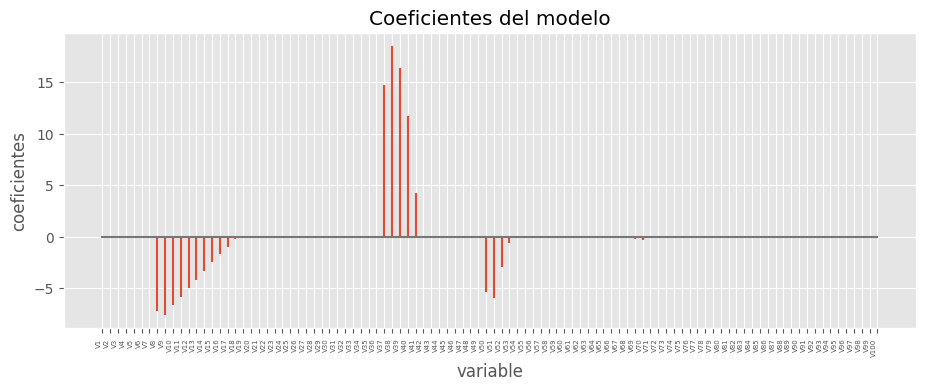

In [38]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [39]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([34.02536159, 53.11087452, 35.75425264, 11.99819527, 15.14548287,
        6.42713465, 24.40691555,  7.50121086, 13.62452751, 18.97739918])

In [41]:
# Error de test del modelo
# ==============================================================================
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones
             )
print("")
# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_lasso = np.sqrt(rmse_lasso)
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 3.873214993732762


Las predicciones del modelo final se alejan en promedio 3.95 unidades del valor real, utilizando solo 22 de los 100 predictores disponibles.

**Elastic net**

In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto ElasticNetCV utiliza el mean squared error
modelo = ElasticNetCV(
            l1_ratio        = np.logspace(-10, 3, 200),
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)
# Evolución del error en función de alpha y l1_ratio
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha y l1_ratio.
# Tiene dimensiones (n_l1_ratio, n_alpha, n_folds)

# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = modelo.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha)
# Se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo.l1_ratio, modelo.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

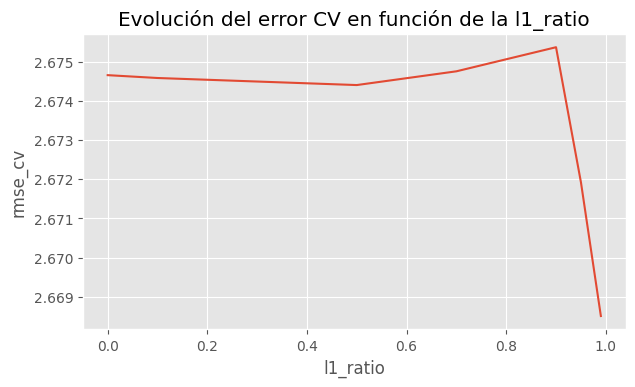

In [43]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [44]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo.l1_ratio_}")

Mejor valor de alpha encontrado: 9.658832241158708e-07
Mejor valor de l1_ratio encontrado: 0.99


In [45]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

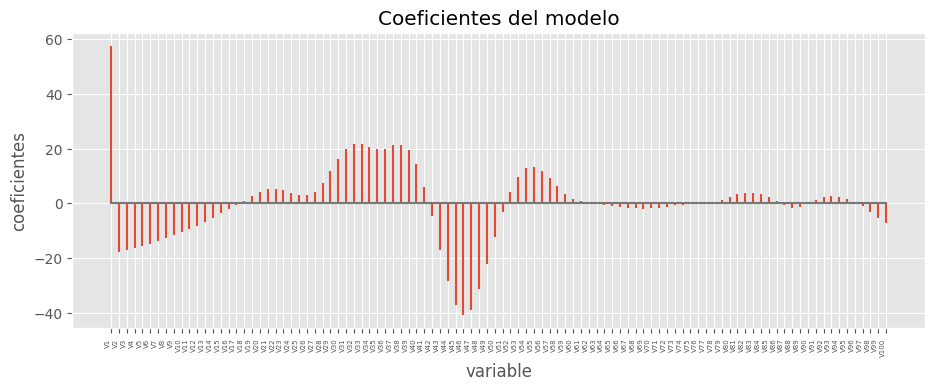

In [46]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [51]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
# Error de test del modelo
# ==============================================================================
rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones
               )
print("")

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_elastic = np.sqrt(rmse_elastic)
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 5.232878476528986


**Comparación**


Se compara el error de test (rmse) de los 4 modelos

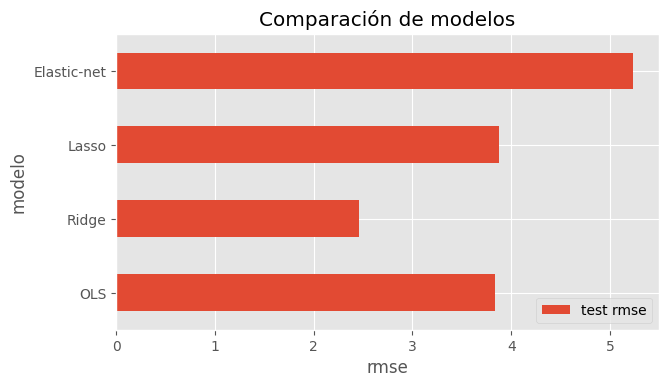

In [52]:
df_comparacion = pd.DataFrame({
                    'modelo': ['OLS', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

En este caso el mejor modelo se obtiene aplicando regularización Ridge. El modelo con regularización Lasso tiene un error ligeramente superior al modelo OLS pero emplea solo 24 predictores en lugar de 100. La regularización Elastic-net empeora el modelo.